In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from cmath import exp
from math import sin, pi

In [2]:
def discretization_plot(f, mod_f, func_name):
    x = [i * 0.1 for i in range(100)]
    plt.plot(x, f[:100], color='blue', label='Normal')
    plt.plot(x, mod_f[:100], color='red', label='With nullified coefficients')
    plt.title(func_name, fontsize=25)
    plt.legend(fontsize=10)
    plt.xlabel('Argument', fontsize=15)
    plt.ylabel('Value', fontsize=15)
    plt.grid(True)
    plt.show()

In [3]:
def FFT(x):
    sz = len(x)
    if(sz == 1):
        return x
    x_0 = FFT(x[0::2]) #even
    x_1 = FFT(x[1::2]) #odd
    complex_exp = exp(-1j * pi / (sz // 2))
    cur_exp = 1
    y = [0] * sz
    for i in range(sz // 2):
        y[i] = x_0[i] + cur_exp * x_1[i]
        y[i + sz // 2] = x_0[i] - cur_exp * x_1[i]
        cur_exp *= complex_exp
    return y

In [4]:
def FFTReverse(x):
    sz = len(x)
    if(sz == 1):
        return x
    x_0 = FFTReverse(x[0::2]) #even
    x_1 = FFTReverse(x[1::2]) #odd
    complex_exp = exp(1j * pi / (sz // 2))
    cur_exp = 1
    y = [0] * sz
    for i in range(sz // 2):
        y[i] = (x_0[i] + cur_exp * x_1[i]) / 2
        y[i + sz // 2] = (x_0[i] - cur_exp * x_1[i]) / 2
        cur_exp *= complex_exp
    return y

In [5]:
def get_discretization(func):
    x = [i * 0.1 for i in range(128)]
    y = [func(i) * 0.1 for i in range(128)]
    return x, y

In [6]:
def identical(x):
    return x
def square(x):
    return x**2
def sin_square(x):
    return sin(x**2)
def sin_div_x(x):
    if x == 0:
        return 0
    return sin(x) / x

In [7]:
def zeroize(x, coef):
    sz = len(x)
    for i in range(int(sz * (1 - coef)), sz):
        x[i] = 0
    return x

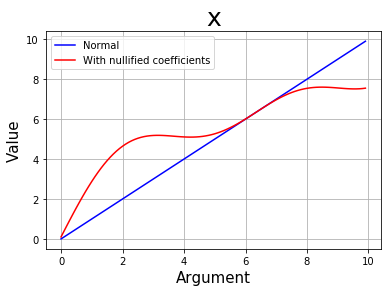

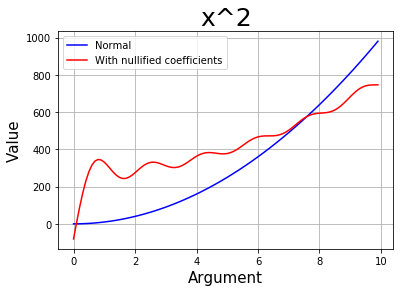

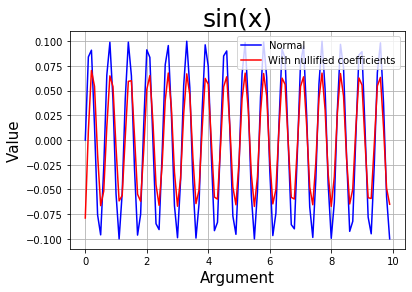

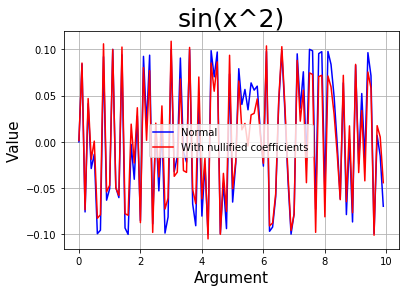

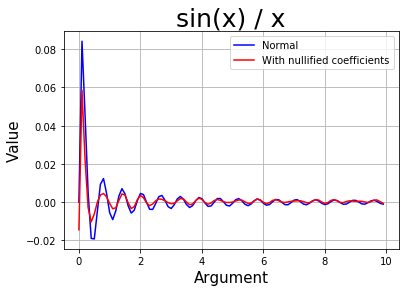

In [9]:
functions = (identical, square, sin, sin_square, sin_div_x)
names = ("x", "x^2", "sin(x)", "sin(x^2)", "sin(x) / x")
parts = (0.01, 0.05, 0.15, 0.1, 0.2)
for func, name, part in zip(functions, names, parts):
    x, f = get_discretization(func)
    g = FFT(f)
    f2 = FFTReverse(g)
    mod_g = zeroize(g, part)
    mod_f2 = FFTReverse(mod_g)
    discretization_plot(f2, mod_f2, name)